# Data Pre-processing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv(r"c:\users\sushmita sahoo\sourav drive\infosys\rename_processed_dataset.csv")

In [3]:
df.shape

(25000, 19)

In [4]:
df.head()

,Local Incoming Instances,Mobile Percentage,Day Non-Usage Percentage,New Revenue Percentage,Day Non-Usage Percentage.1,Incoming Usage Percentage,target,Revenue Percentage,Data Usage Percentage,Outgoing Data Usage Percentage,Roaming Usage Percentage,Roaming Usage Months,Revenue Percentage.1,Recharge Value Percentag,Low Balance Instances Percentage,Local Instances,Data Instances,Outgoing Revenue Month,Local Incoming-Outgoing Usage Percentage
0,3,-0.72,1.000000,7.16,0.500000,-0.29,1,0.09,0,0,-0.40,0.552297,-0.12,0,4,13,0,6.0200,0.609456
1,3,-0.08,0.500000,4.43,0.500000,0.00,1,0.09,0,0,-0.11,0.552297,-0.15,0,4,13,0,4.2075,0.716538
2,3,-0.09,0.384615,4.43,0.384615,-0.29,1,0.09,0,0,-0.39,0.552297,-0.07,0,4,14,0,4.3300,0.699592
3,4,1.04,0.416667,4.43,0.250000,-0.29,0,0.09,0,0,-0.02,1.176028,-0.15,0,3,14,0,4.2075,0.251304
4,4,-0.04,0.222222,5.12,0.500000,-0.29,0,0.09,0,0,-0.40,1.176028,0.01,0,0,14,2,4.2075,0.683105


### Checking Misclassified datatype

In [5]:
df.dtypes

Local Incoming Instances                      int64
Mobile Percentage                           float64
Day Non-Usage Percentage                    float64
New Revenue Percentage                      float64
Day Non-Usage Percentage.1                  float64
Incoming Usage Percentage                   float64
target                                        int64
Revenue Percentage                          float64
Data Usage Percentage                         int64
Outgoing Data Usage Percentage                int64
Roaming Usage Percentage                    float64
Roaming Usage Months                        float64
Revenue Percentage.1                        float64
Recharge Value Percentag                      int64
Low Balance Instances Percentage              int64
Local Instances                               int64
Data Instances                                int64
Outgoing Revenue Month                      float64
Local Incoming-Outgoing Usage Percentage    float64
dtype: objec

In [6]:
for column in df.columns:
    if df[column].dtype not in ['float64', 'int64']:
        print(f"Non-Numeric datatype: {column}")
else:
    print("All datatypes are either float or int")

All datatypes are either float or int


### Checking Null Values

In [7]:
if df.isnull().sum().sum() > 0:
    print("Null values found:")
    print(df.isnull().sum())
else: 
    print("No null values")

No null values


### Checking Duplicate Rows or Columns

In [8]:
duplicate_row = df[df.duplicated()]
if not duplicate_row.empty:
    print(f"Duplicate rows:\n{duplicate_row}")
else:
    print("No duplicate rows")

Duplicate rows:
       Local Incoming Instances  Mobile Percentage  Day Non-Usage Percentage  \
2133                          3               0.00                  0.250000   
2636                          3               0.00                  0.437500   
3408                          3               0.00                  0.437500   
3799                          3               0.00                  0.291667   
4811                          3               0.00                  0.333333   
8242                          3               0.00                  0.318182   
9858                          3               0.00                  0.291667   
10735                         3               0.00                  0.291667   
10886                         3               0.00                  0.411765   
11112                         3               0.00                  0.280000   
12253                         3               0.00                  0.333333   
14295                   

In [9]:
transpose_df = df.T
duplicate_column = transpose_df[transpose_df.duplicated()]

if not duplicate_column.empty:
    dup = duplicate_column.T
    print(f"Duplicate columns:\n{dup.columns}")
    df.drop(columns=dup.columns, inplace=True)
    print("Duplicate columns removed")
else:
    print("No duplicate columns")

Duplicate columns:
Index(['Outgoing Data Usage Percentage'], dtype='object')
Duplicate columns removed


### Checking unique row values

In [10]:
unique_col = []
for column in df.columns:
    if df[column].nunique() == len(df):
        unique_col.append(column)

if unique_col:
    print(f"Unique columns: {unique_col}")
else:
    print("No unique columns")

No unique columns


### Checking Zero Variance

In [11]:
zero_variance = []
for column in df.columns:
    if df[column].var() == 0:
        zero_variance.append(column)

if zero_variance:
    print(f"Zero variance columns: {zero_variance}")
    df.drop(columns=zero_variance, inplace=True)
    print("Zero variance columns removed")
else:
    print("No zero variance columns found")

Zero variance columns: ['Data Usage Percentage']
Zero variance columns removed


### Outlier Treatment

In [12]:
df.describe()

,Local Incoming Instances,Mobile Percentage,Day Non-Usage Percentage,New Revenue Percentage,Day Non-Usage Percentage.1,Incoming Usage Percentage,target,Revenue Percentage,Roaming Usage Percentage,Roaming Usage Months,Revenue Percentage.1,Recharge Value Percentag,Low Balance Instances Percentage,Local Instances,Data Instances,Outgoing Revenue Month,Local Incoming-Outgoing Usage Percentage
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,3.633120,-0.598729,28.505430,8.433490,0.216098,-0.033500,0.316680,0.163775,-0.075455,0.861815,-0.015296,0.505240,1.552280,13.633720,0.624320,6.788847,0.481694
std,0.481963,1.407088,44.586706,3.506665,0.227381,0.198211,0.465191,0.060219,0.249993,0.250878,0.108016,0.499983,1.703979,0.481797,0.881825,2.289081,0.188695
min,3.000000,-2.560000,0.100000,4.430000,0.000000,-0.290000,0.000000,0.090000,-0.400000,0.552297,-0.150000,0.000000,0.000000,13.000000,0.000000,4.207500,0.251304
25%,3.000000,-2.560000,0.100000,4.430000,0.000000,-0.290000,0.000000,0.090000,-0.400000,0.552309,-0.150000,0.000000,0.000000,13.000000,0.000000,4.209375,0.251322
50%,4.000000,-0.080000,0.363636,7.820000,0.000000,-0.020000,0.000000,0.160000,-0.050000,0.860550,-0.010000,1.000000,1.000000,14.000000,0.000000,6.345000,0.477621
75%,4.000000,1.040000,99.000000,13.060000,0.500000,0.210000,1.000000,0.240000,0.230000,1.176022,0.120000,1.000000,4.000000,14.000000,2.000000,9.830000,0.716536
max,4.000000,1.040000,99.000000,13.060000,0.500000,0.210000,1.000000,0.240000,0.230000,1.176028,0.120000,1.000000,4.000000,14.000000,2.000000,9.830000,0.716538


In [13]:
capped_floored_data = df.copy()
outliers_col = {}

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    if skew(df[column]) > 1:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        IQR = q3 - q1
        upper_threshold = q3 + 1.5 * IQR
        lower_threshold = q1 - 1.5 * IQR

        outliers = df[(df[column] > upper_threshold) | (df[column] < lower_threshold)]
        outliers_col[column] = outliers
        capped_floored_data[column] = capped_floored_data[column].clip(lower=lower_threshold, upper=upper_threshold)
    else:
        upper_limit = df[column].mean() + 3 * df[column].std()
        lower_limit = df[column].mean() - 3 * df[column].std()
        
        outliers = df[(df[column] > upper_limit) | (df[column] < lower_limit)]
        outliers_col[column] = outliers
        capped_floored_data[column] = capped_floored_data[column].clip(lower=lower_limit, upper=upper_limit)

print("Outliers treatment completed")

#to check out the Outliers and data after treating outliers
# print(outliers_col)
# print(capped_floored_data) 

Outliers treatment completed


### Removing highly correlated data

In [14]:
correlation_matrix = capped_floored_data.corr().abs()
highly_correlated = correlation_matrix > 0.8
columns_to_drop = set()

for col in highly_correlated.columns:
    correlated_cols = list(highly_correlated[col][highly_correlated[col]].index)
    for correlated_col in correlated_cols:
        if correlated_col != col and correlated_col not in columns_to_drop:
            columns_to_drop.add(correlated_col)

print(f"Number of highly correlated columns: {len(columns_to_drop)}")
data_filtered = capped_floored_data.drop(columns=columns_to_drop)
print(f"Highly correlated columns removed. Now data has (rows, columns): {data_filtered.shape}")


Number of highly correlated columns: 0
Highly correlated columns removed. Now data has (rows, columns): (25000, 17)


### Multicollinearity

In [15]:
vif_raw = data_filtered
vif_data = pd.DataFrame()
vif_data["Variable"] = vif_raw.columns
vif_data["VIF"] = [variance_inflation_factor(vif_raw.values, i) for i in range(vif_raw.shape[1])]

high_vif_variables = vif_data[vif_data["VIF"] > 5]
print(f"Variables with high VIF: {high_vif_variables}")

Variables with high VIF:                                     Variable         VIF
0                   Local Incoming Instances   87.847137
3                     New Revenue Percentage   12.885266
7                         Revenue Percentage   19.040589
9                       Roaming Usage Months   13.430729
13                           Local Instances  140.465873
15                    Outgoing Revenue Month   16.192692
16  Local Incoming-Outgoing Usage Percentage    7.724100


In [16]:
# Accessing the final updated dataset
final_dataset = data_filtered
print(f"Final dataset shape: {final_dataset.shape}")

# Display the first few rows of the final updated dataset
print(final_dataset.head())

Final dataset shape: (25000, 17)
   Local Incoming Instances  Mobile Percentage  Day Non-Usage Percentage  \
0                         3              -0.72                  1.000000   
1                         3              -0.08                  0.500000   
2                         3              -0.09                  0.384615   
3                         4               1.04                  0.416667   
4                         4              -0.04                  0.222222   

   New Revenue Percentage  Day Non-Usage Percentage.1  \
0                    7.16                    0.500000   
1                    4.43                    0.500000   
2                    4.43                    0.384615   
3                    4.43                    0.250000   
4                    5.12                    0.500000   

   Incoming Usage Percentage  target  Revenue Percentage  \
0                      -0.29       1                0.09   
1                       0.00       1           

## Preparing Logistic Regression Model

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [18]:
final_dataset = data_filtered.copy()

X = final_dataset.drop(columns=['target'])
y = final_dataset['target']

In [19]:
# split the data into training set and testing set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42, stratify=y)

In [20]:
# Standardize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [21]:
# Create a logistic regression model
log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(x_train_scaled, y_train)

LogisticRegression(random_state=42)

In [22]:
# Make predictions on the test set
y_pred = log_reg.predict(x_test_scaled)
y_pred_proba = log_reg.predict_proba(x_test_scaled)[:, 1]

In [23]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print evaluation metrics
print(f"\nAccuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"\nROC AUC Score: {roc_auc:.4f}")


Accuracy: 0.7698

Confusion Matrix:
[[3017  400]
 [ 751  832]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      3417
           1       0.68      0.53      0.59      1583

    accuracy                           0.77      5000
   macro avg       0.74      0.70      0.72      5000
weighted avg       0.76      0.77      0.76      5000


ROC AUC Score: 0.8155


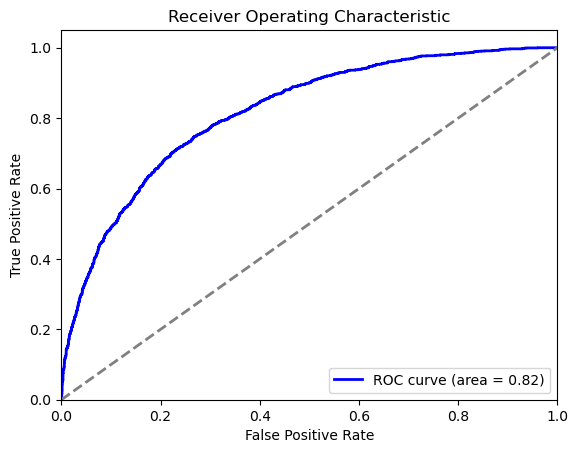

In [24]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()